<h1><b>Common-Regression-Models</b></h1>

In [1]:
import pandas as pd
import numpy as np

# Function Which Generates the Dataset
def generate_travel_data(n_samples=None, random_state=42):
    np.random.seed(random_state)
    
    # Features
    distance = np.random.uniform(1, 50, n_samples)  # in km
    time_of_day = np.random.randint(0, 24, n_samples)  # 0–23 hours
    day_of_week = np.random.randint(0, 7, n_samples)  # 0=Monday, 6=Sunday
    traffic_level = np.random.choice(['light', 'moderate', 'heavy'], size=n_samples, p=[0.4, 0.4, 0.2])
    weather = np.random.choice(['clear', 'rain', 'fog', 'snow'], size=n_samples, p=[0.6, 0.25, 0.1, 0.05])

    # Simulated base speed (km/h) affected by traffic and weather
    base_speed = 60
    speed_modifiers = {
        'light': 1.0,
        'moderate': 0.75,
        'heavy': 0.5,
        'clear': 1.0,
        'rain': 0.8,
        'fog': 0.6,
        'snow': 0.5
    }
    
    # Calculate speed based on traffic and weather
    speed = base_speed * np.array([speed_modifiers[t] for t in traffic_level]) * \
                         np.array([speed_modifiers[w] for w in weather])

    # Estimate travel time = distance / speed, converted to minutes
    travel_time = (distance / speed) * 60
    # Add some noise
    travel_time += np.random.normal(loc=0.0, scale=3.0, size=n_samples)

    # Construct DataFrame
    df = pd.DataFrame({
        'distance_km': distance,
        'time_of_day': time_of_day,
        'day_of_week': day_of_week,
        'traffic_level': traffic_level,
        'weather': weather,
        'travel_time_min': travel_time
    })

    return df

In [2]:
df = generate_travel_data(500)
df.head(10)

,distance_km,time_of_day,day_of_week,traffic_level,weather,travel_time_min
0,19.352466,21,2,light,clear,17.712944
1,47.585001,16,1,heavy,fog,157.069519
2,36.867703,8,2,light,rain,46.978576
3,30.334266,0,0,light,clear,32.616980
4,8.644913,20,2,moderate,clear,10.927965
5,8.643731,19,2,moderate,clear,8.035407
6,3.846097,12,3,moderate,rain,4.202750
7,43.442631,15,2,light,snow,87.496279
8,30.454636,12,2,heavy,rain,76.711152
9,35.695556,13,5,light,clear,36.419271


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   distance_km      500 non-null    float64
 1   time_of_day      500 non-null    int32  
 2   day_of_week      500 non-null    int32  
 3   traffic_level    500 non-null    object 
 4   weather          500 non-null    object 
 5   travel_time_min  500 non-null    float64
dtypes: float64(2), int32(2), object(2)
memory usage: 19.7+ KB


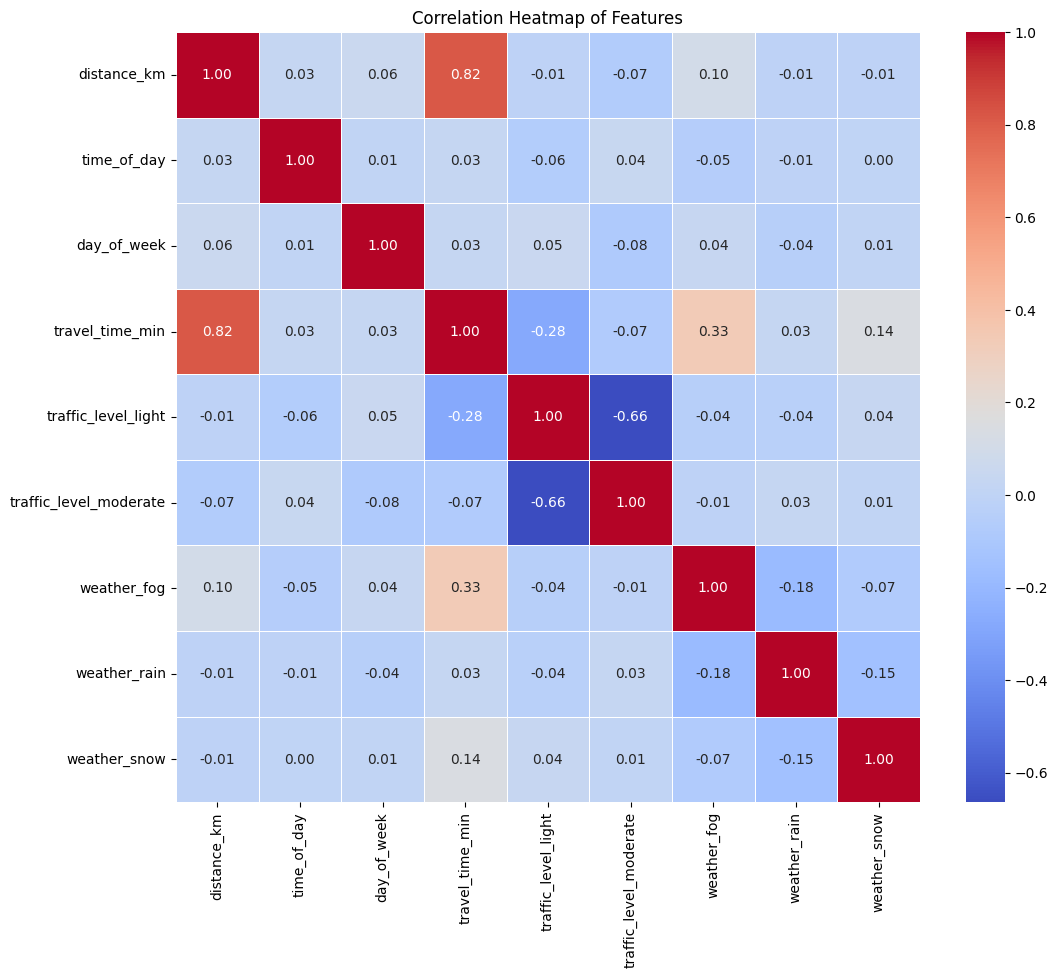

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# One-hot encode categorical columns
df_for_heat_map = pd.get_dummies(df, columns=['traffic_level', 'weather'], drop_first=True)

# Compute the correlation matrix of the encoded DataFrame
correlation_matrix = df_for_heat_map.corr()

# Set up the plot size
plt.figure(figsize=(12, 10))

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Title for the heatmap
plt.title('Correlation Heatmap of Features')

# Show the plot
plt.show()


In [5]:
X = df.drop('travel_time_min', axis=1)
y = df['travel_time_min']

In [6]:
# Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical = ['traffic_level', 'weather']
numeric = ['distance_km', 'time_of_day', 'day_of_week']
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric),
    ('cat', OneHotEncoder(drop='first'), categorical)
])

# 1. Linear Regression

### Definition:
Linear regression is the simplest and most commonly used regression algorithm. It assumes a linear relationship between the independent and dependent variables.

### Real-World Usage:
- Housing price prediction based on features like size, location, etc.
- Sales forecasting based on historical sales data.


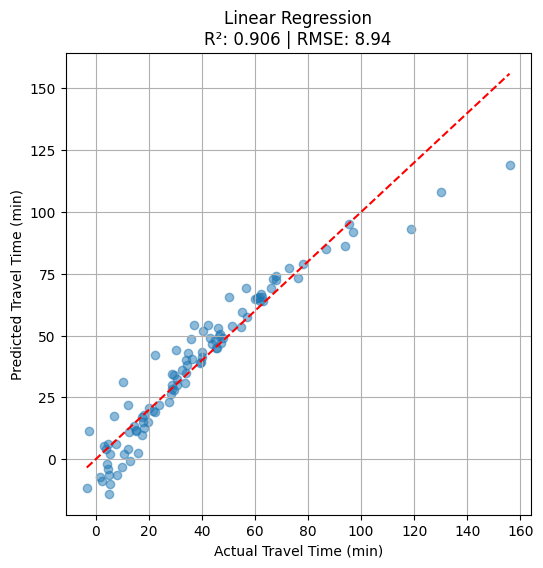

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Create pipeline
linear_model = Pipeline([
    ('preprocess', preprocessor),
    ('regressor', LinearRegression())
])

# Train
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)

# Evaluate
mse_linear = mean_squared_error(y_test, y_pred)
r2_linear = r2_score(y_test, y_pred)

# Visualize
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Travel Time (min)")
plt.ylabel("Predicted Travel Time (min)")
plt.title(f"Linear Regression\nR²: {r2_linear:.3f} | RMSE: {np.sqrt(mse_linear):.2f}")
plt.grid(True)
plt.show()

# 2. Polynomial Regression

### Definition:
Polynomial regression extends linear regression by adding polynomial terms to model non-linear relationships between the features and the target variable.

### Real-World Usage:
- Modeling growth curves or population dynamics.
- Predicting fuel efficiency based on various conditions.


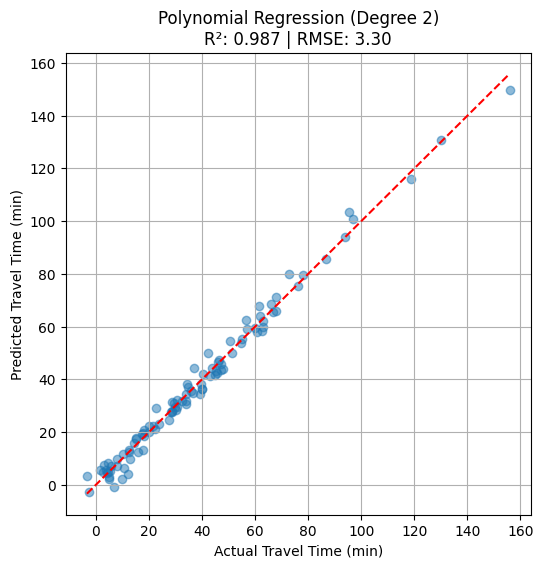

In [9]:
from sklearn.preprocessing import PolynomialFeatures

# Create pipeline
poly_model = Pipeline([
    ('preprocess', preprocessor),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('regressor', LinearRegression())
])

# Train
poly_model.fit(X_train, y_train)
y_pred_poly = poly_model.predict(X_test)

# Evaluate
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

# Visualize
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_poly, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Travel Time (min)")
plt.ylabel("Predicted Travel Time (min)")
plt.title(f"Polynomial Regression (Degree 2)\nR²: {r2_poly:.3f} | RMSE: {np.sqrt(mse_poly):.2f}")
plt.grid(True)
plt.show()

# 3. Ridge Regression

### Definition:
Ridge regression applies L2 regularization, which penalizes large coefficients to prevent overfitting in linear regression models.

### Real-World Usage:
- Finance risk modeling, where you want to minimize the impact of irrelevant features.
- Gene expression analysis, where predictors can be highly collinear.


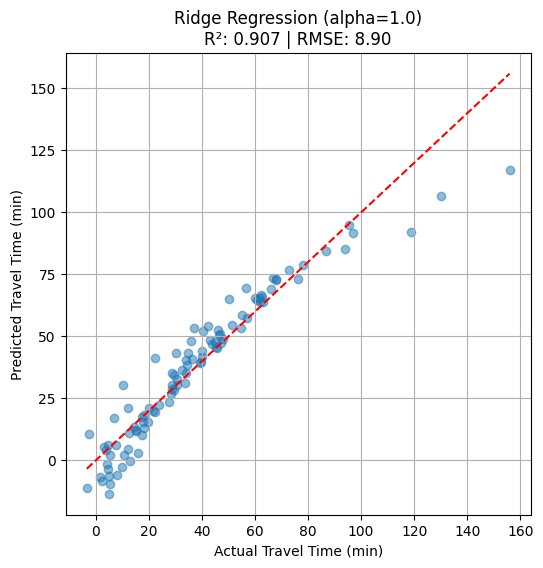

In [10]:
from sklearn.linear_model import Ridge

# Create pipeline
ridge_model = Pipeline([
    ('preprocess', preprocessor),
    ('regressor', Ridge(alpha=1.0))  # You can tune alpha
])

# Train
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Visualize
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_ridge, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Travel Time (min)")
plt.ylabel("Predicted Travel Time (min)")
plt.title(f"Ridge Regression (alpha=1.0)\nR²: {r2_ridge:.3f} | RMSE: {np.sqrt(mse_ridge):.2f}")
plt.grid(True)
plt.show()

# 4. Lasso Regression

### Definition:
Lasso (Least Absolute Shrinkage and Selection Operator) regression is similar to ridge regression but uses L1 regularization, which can lead to sparse solutions (i.e., some coefficients become exactly zero).

### Real-World Usage:
- Feature selection in text mining or genomic data analysis.
- Predictive modeling where many features may not contribute much to the outcome.


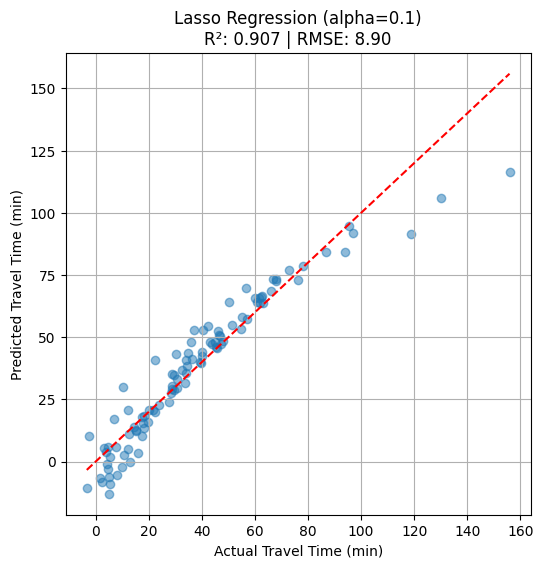

In [11]:
from sklearn.linear_model import Lasso

# Create pipeline
lasso_model = Pipeline([
    ('preprocess', preprocessor),
    ('regressor', Lasso(alpha=0.1, max_iter=10000))  # alpha controls sparsity
])

# Train
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Visualize
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_lasso, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Travel Time (min)")
plt.ylabel("Predicted Travel Time (min)")
plt.title(f"Lasso Regression (alpha=0.1)\nR²: {r2_lasso:.3f} | RMSE: {np.sqrt(mse_lasso):.2f}")
plt.grid(True)
plt.show()

# 5. Elastic Net Regression

### Definition:
Elastic Net combines the penalties of both ridge and lasso regression, balancing between L1 and L2 regularization.

### Real-World Usage:
- Medical data analysis, where you have many correlated features.
- High-dimensional sensor data like in time-series forecasting.


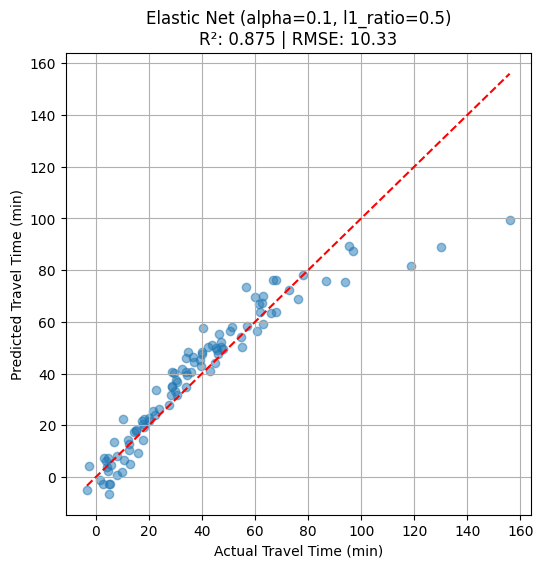

In [12]:
from sklearn.linear_model import ElasticNet

# Create pipeline
enet_model = Pipeline([
    ('preprocess', preprocessor),
    ('regressor', ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=10000))
])

# Train
enet_model.fit(X_train, y_train)
y_pred_enet = enet_model.predict(X_test)

# Evaluate
mse_enet = mean_squared_error(y_test, y_pred_enet)
r2_enet = r2_score(y_test, y_pred_enet)

# Visualize
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_enet, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Travel Time (min)")
plt.ylabel("Predicted Travel Time (min)")
plt.title(f"Elastic Net (alpha=0.1, l1_ratio=0.5)\nR²: {r2_enet:.3f} | RMSE: {np.sqrt(mse_enet):.2f}")
plt.grid(True)
plt.show()

# 6. Support Vector Regression (SVR)

### Definition:
Support Vector Regression uses support vector machines (SVM) principles to model data. It finds an optimal hyperplane that best fits the data, even when data is nonlinear.

### Real-World Usage:
- Stock price prediction based on historical trends.
- Time series forecasting for trend analysis.


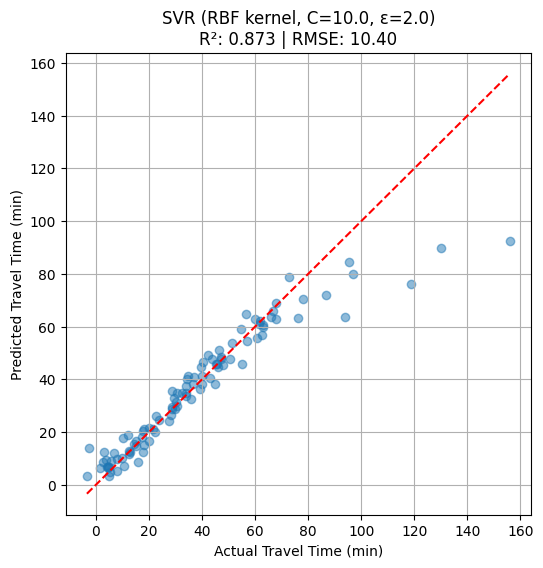

In [13]:
from sklearn.svm import SVR

# SVR needs all features scaled → modify preprocessor
scaled_preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric),
    ('cat', OneHotEncoder(drop='first'), categorical)
])

# Create pipeline
svr_model = Pipeline([
    ('preprocess', scaled_preprocessor),
    ('regressor', SVR(kernel='rbf', C=10.0, epsilon=2.0))
])

# Train
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)

# Evaluate
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

# Visualize
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_svr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Travel Time (min)")
plt.ylabel("Predicted Travel Time (min)")
plt.title(f"SVR (RBF kernel, C=10.0, ε=2.0)\nR²: {r2_svr:.3f} | RMSE: {np.sqrt(mse_svr):.2f}")
plt.grid(True)
plt.show()

# 7. Decision Tree Regression

### Definition:
Decision trees split the data into subsets based on feature values, forming a tree-like structure where each leaf represents a predicted output.

### Real-World Usage:
- Traffic flow prediction based on historical patterns.
- Customer segmentation in marketing.


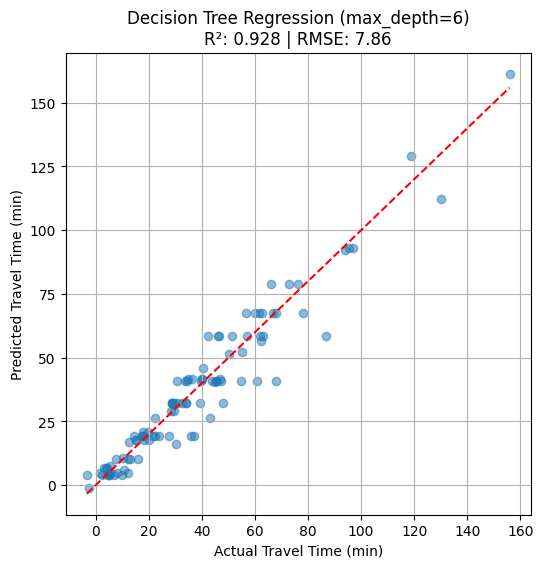

In [14]:
from sklearn.tree import DecisionTreeRegressor

# Create pipeline
tree_model = Pipeline([
    ('preprocess', preprocessor),
    ('regressor', DecisionTreeRegressor(max_depth=6, random_state=42))
])

# Train
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

# Evaluate
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

# Visualize
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_tree, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Travel Time (min)")
plt.ylabel("Predicted Travel Time (min)")
plt.title(f"Decision Tree Regression (max_depth=6)\nR²: {r2_tree:.3f} | RMSE: {np.sqrt(mse_tree):.2f}")
plt.grid(True)
plt.show()

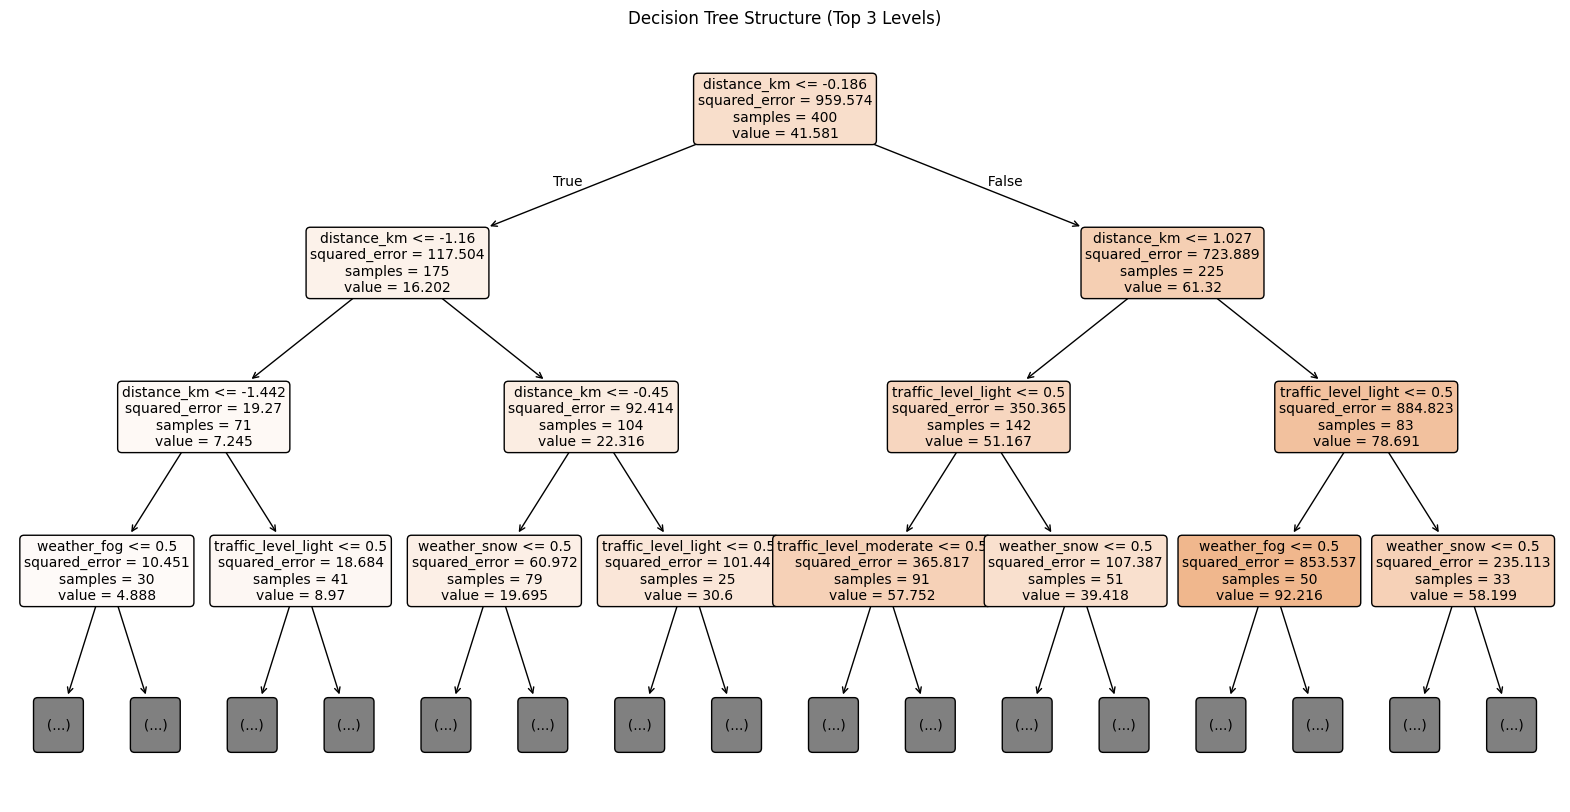

In [15]:
from sklearn.tree import plot_tree

# Extract the fitted DecisionTreeRegressor
fitted_tree = tree_model.named_steps['regressor']

# Get feature names after preprocessing
# Need to retrieve one-hot encoder categories
ohe = preprocessor.named_transformers_['cat']
encoded_cat_features = ohe.get_feature_names_out(categorical)
all_features = numeric + list(encoded_cat_features)

plt.figure(figsize=(20, 10))
plot_tree(fitted_tree,
          feature_names=all_features,
          filled=True,
          rounded=True,
          max_depth=3,  # visualize only top 3 levels for readability
          fontsize=10)
plt.title("Decision Tree Structure (Top 3 Levels)")
plt.show()

# 8. Random Forest Regression

### Definition:
Random Forests are an ensemble of decision trees. Each tree is trained on a random subset of data, and the final prediction is the average of all the trees’ predictions.

### Real-World Usage:
- Energy demand forecasting based on weather and consumption history.
- Predicting product prices based on various market factors.


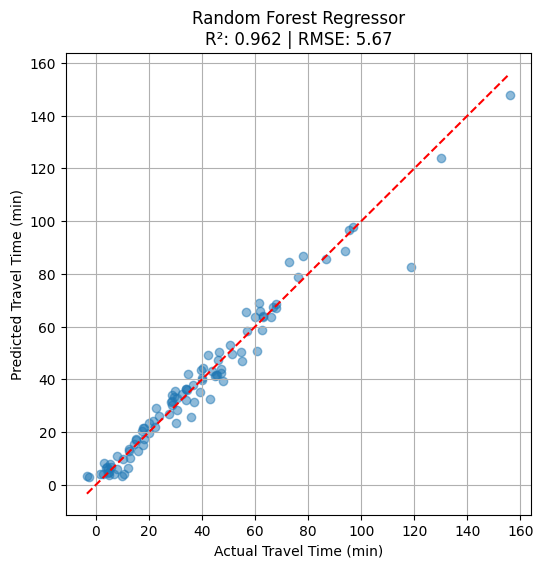

In [16]:
from sklearn.ensemble import RandomForestRegressor

# Create pipeline
rf_model = Pipeline([
    ('preprocess', preprocessor),
    ('regressor', RandomForestRegressor(
        n_estimators=100,
        max_depth=10,
        random_state=42,
        n_jobs=-1  # use all CPU cores
    ))
])

# Train
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Visualize
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Travel Time (min)")
plt.ylabel("Predicted Travel Time (min)")
plt.title(f"Random Forest Regressor\nR²: {r2_rf:.3f} | RMSE: {np.sqrt(mse_rf):.2f}")
plt.grid(True)
plt.show()

# 9. Gradient Boosting Regressor

### Definition:
Gradient Boosting is a technique where trees are built sequentially, and each new tree corrects the errors of the previous ones. It often leads to high predictive accuracy.

### Real-World Usage:
- Credit scoring in financial institutions.
- Fraud detection where small discrepancies can be crucial.


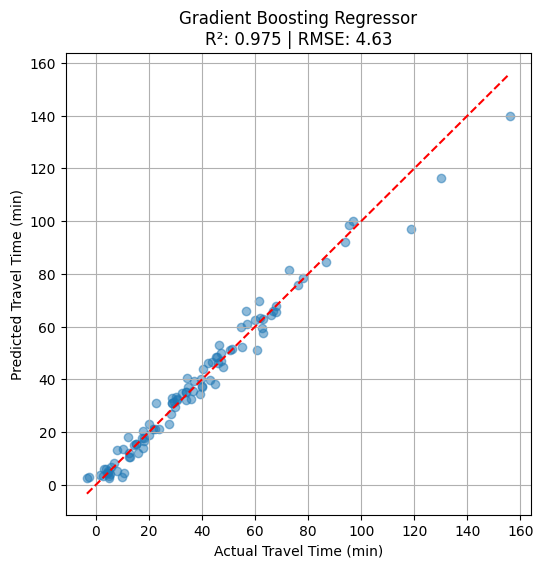

In [17]:
from sklearn.ensemble import GradientBoostingRegressor

# Create pipeline
gbr_model = Pipeline([
    ('preprocess', preprocessor),
    ('regressor', GradientBoostingRegressor(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=3,
        random_state=42
    ))
])

# Train
gbr_model.fit(X_train, y_train)
y_pred_gbr = gbr_model.predict(X_test)

# Evaluate
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

# Visualize
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_gbr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Travel Time (min)")
plt.ylabel("Predicted Travel Time (min)")
plt.title(f"Gradient Boosting Regressor\nR²: {r2_gbr:.3f} | RMSE: {np.sqrt(mse_gbr):.2f}")
plt.grid(True)
plt.show()

# 10. XGBoost Regressor

### Definition:
XGBoost (Extreme Gradient Boosting) is an optimized version of gradient boosting that is faster and more scalable, often used in machine learning competitions.

### Real-World Usage:
- Competition-winning models like Kaggle.
- Sales forecasting for e-commerce companies.


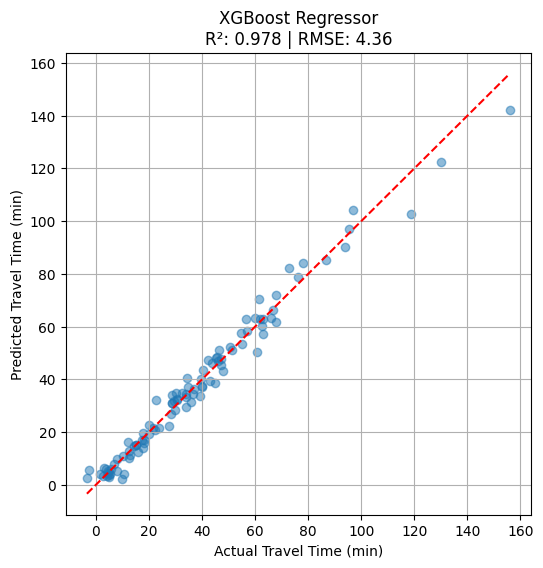

In [18]:
import xgboost as xgb
from sklearn.pipeline import Pipeline

# Create pipeline
xgb_model = Pipeline([
    ('preprocess', preprocessor),
    ('regressor', xgb.XGBRegressor(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=3,
        random_state=42,
        objective='reg:squarederror',  # regression with squared error
        n_jobs=-1
    ))
])

# Train
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# Visualize
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_xgb, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Travel Time (min)")
plt.ylabel("Predicted Travel Time (min)")
plt.title(f"XGBoost Regressor\nR²: {r2_xgb:.3f} | RMSE: {np.sqrt(mse_xgb):.2f}")
plt.grid(True)
plt.show()

# 11. K-Nearest Neighbors (KNN) Regression

### Definition:
KNN regression predicts the output based on the average of the k-nearest neighbors in the feature space. It is sensitive to feature scaling and works well for small datasets.

### Real-World Usage:
- Recommender systems in e-commerce or movie streaming.
- Localized traffic time prediction based on nearby conditions.

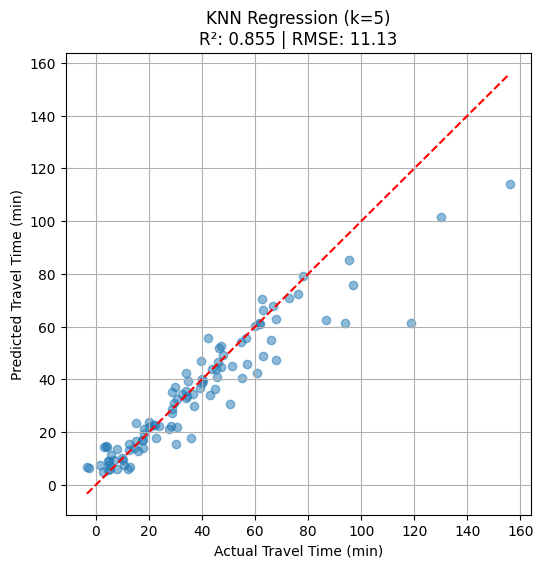

In [19]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = Pipeline([
    ('preprocess', preprocessor),
    ('regressor', KNeighborsRegressor(n_neighbors=5))
])

# Train
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Evaluate
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

# Visualize
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_knn, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Travel Time (min)")
plt.ylabel("Predicted Travel Time (min)")
plt.title(f"KNN Regression (k=5)\nR²: {r2_knn:.3f} | RMSE: {np.sqrt(mse_knn):.2f}")
plt.grid(True)
plt.show()


# 12. Bayesian Ridge Regression

### Definition:
Bayesian Ridge Regression applies Bayesian inference to linear regression, allowing for probabilistic predictions and uncertainty estimation.

### Real-World Usage:
- Predictive maintenance in manufacturing.
- Financial risk assessment where uncertainty quantification is critical.

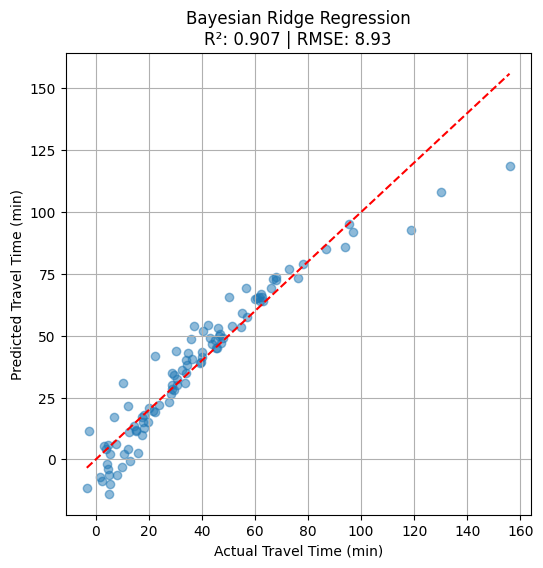

In [20]:
from sklearn.linear_model import BayesianRidge

# Use the same preprocessor as linear models (scaling is good but not mandatory)
bayesian_ridge_model = Pipeline([
    ('preprocess', preprocessor),
    ('regressor', BayesianRidge())
])

# Train
bayesian_ridge_model.fit(X_train, y_train)
y_pred_bayesian = bayesian_ridge_model.predict(X_test)

# Evaluate
mse_bayes = mean_squared_error(y_test, y_pred_bayesian)
r2_bayes = r2_score(y_test, y_pred_bayesian)

# Visualize
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_bayesian, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Travel Time (min)")
plt.ylabel("Predicted Travel Time (min)")
plt.title(f"Bayesian Ridge Regression\nR²: {r2_bayes:.3f} | RMSE: {np.sqrt(mse_bayes):.2f}")
plt.grid(True)
plt.show()

# 13. Huber Regression

### Definition:
Huber regression combines squared loss (like in linear regression) and absolute loss (like in robust regression), making it less sensitive to outliers.

### Real-World Usage:
- Sensor data analysis where outliers are common.
- Fault detection in industrial settings where some observations may be anomalous.

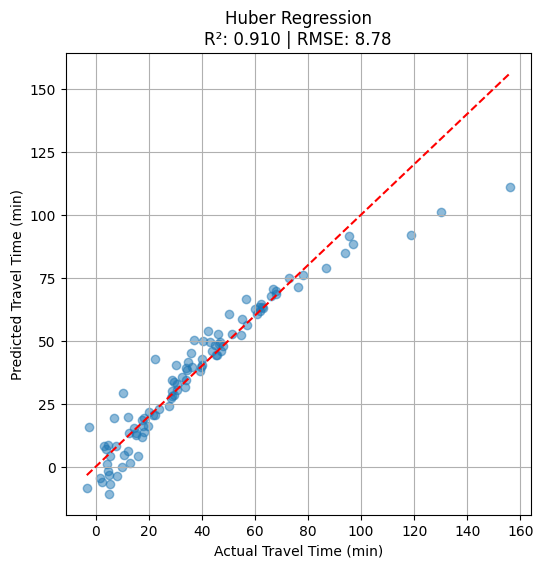

In [21]:
from sklearn.linear_model import HuberRegressor

# Use the same preprocessor as for linear models
huber_model = Pipeline([
    ('preprocess', preprocessor),
    ('regressor', HuberRegressor(epsilon=1.35))  # epsilon controls sensitivity to outliers
])

# Train
huber_model.fit(X_train, y_train)
y_pred_huber = huber_model.predict(X_test)

# Evaluate
mse_huber = mean_squared_error(y_test, y_pred_huber)
r2_huber = r2_score(y_test, y_pred_huber)

# Visualize
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_huber, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Travel Time (min)")
plt.ylabel("Predicted Travel Time (min)")
plt.title(f"Huber Regression\nR²: {r2_huber:.3f} | RMSE: {np.sqrt(mse_huber):.2f}")
plt.grid(True)
plt.show()


# 14. Theil-Sen Estimator

### Definition:
The Theil-Sen Estimator is a non-parametric regression method that computes the median of slopes for all pairs of points, making it robust to outliers.

### Real-World Usage:
- Environmental data modeling, such as temperature or pollution levels.
- Small, noisy datasets where linear models fail due to outliers.

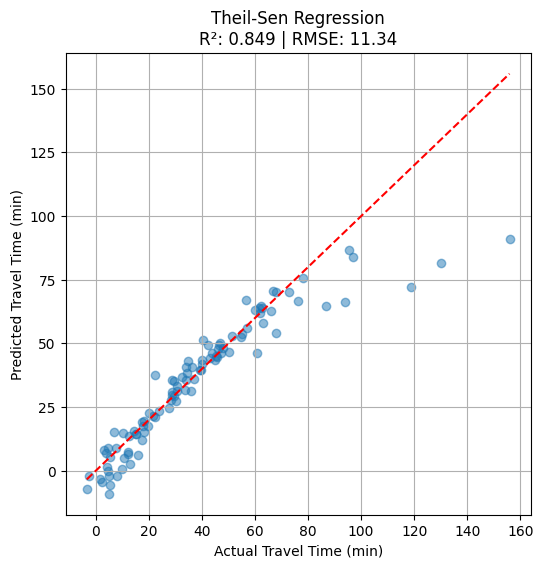

In [22]:
from sklearn.linear_model import TheilSenRegressor

# Use the same preprocessor as linear models
theilsen_model = Pipeline([
    ('preprocess', preprocessor),
    ('regressor', TheilSenRegressor(random_state=42))
])

# Train
theilsen_model.fit(X_train, y_train)
y_pred_theilsen = theilsen_model.predict(X_test)

# Evaluate
mse_theilsen = mean_squared_error(y_test, y_pred_theilsen)
r2_theilsen = r2_score(y_test, y_pred_theilsen)

# Visualize
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_theilsen, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Travel Time (min)")
plt.ylabel("Predicted Travel Time (min)")
plt.title(f"Theil-Sen Regression\nR²: {r2_theilsen:.3f} | RMSE: {np.sqrt(mse_theilsen):.2f}")
plt.grid(True)
plt.show()

# 15. Partial Least Squares Regression (PLS)

### Definition:
PLS regression reduces the dimensionality of the predictor space and uses these components for regression. It’s particularly effective when there is multicollinearity between predictors.

### Real-World Usage:
- Chemometrics for predicting chemical properties based on spectroscopic data.
- Finance, when analyzing correlated economic indicators.

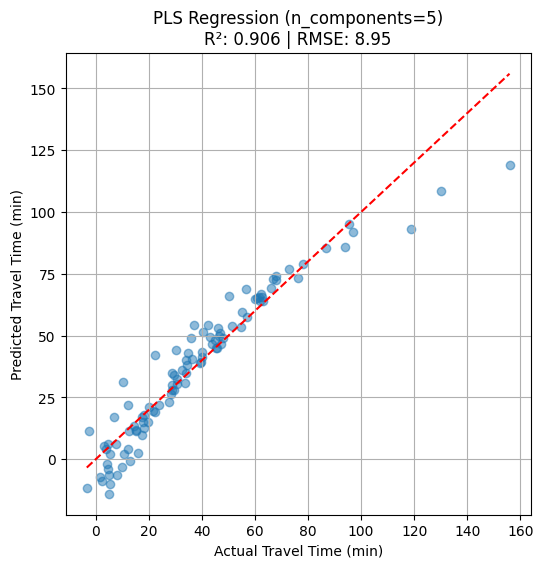

In [23]:
from sklearn.cross_decomposition import PLSRegression

# Use the same preprocessor
pls_model = Pipeline([
    ('preprocess', preprocessor),
    ('regressor', PLSRegression(n_components=5))  # n_components is tunable
])

# Train
pls_model.fit(X_train, y_train)
y_pred_pls = pls_model.predict(X_test).flatten()  # PLS returns shape (n_samples, 1)

# Evaluate
mse_pls = mean_squared_error(y_test, y_pred_pls)
r2_pls = r2_score(y_test, y_pred_pls)

# Visualize
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_pls, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Travel Time (min)")
plt.ylabel("Predicted Travel Time (min)")
plt.title(f"PLS Regression (n_components=5)\nR²: {r2_pls:.3f} | RMSE: {np.sqrt(mse_pls):.2f}")
plt.grid(True)
plt.show()

# 16. Neural Network Regression

### Definition:
Neural Networks learn complex, nonlinear mappings from input features to outputs by adjusting weights in multiple layers of neurons. It's suitable for large datasets with intricate patterns.

### Real-World Usage:
- Time series forecasting for predicting demand or stock prices.
- Image/video processing where high-dimensional features need to be mapped to outputs.

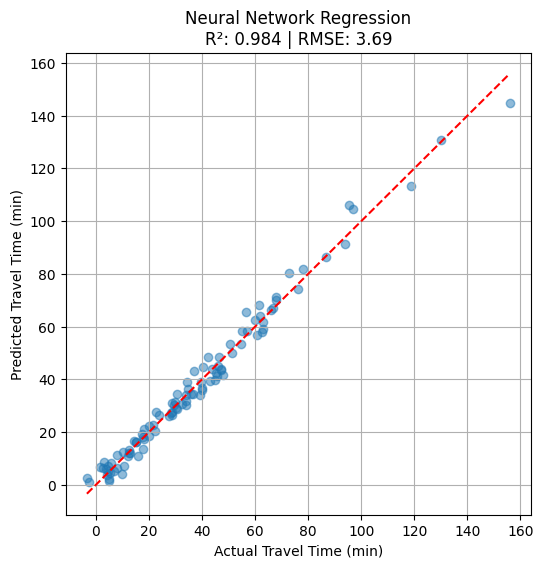

In [24]:
from sklearn.neural_network import MLPRegressor

# Use the same preprocessor (scaling numeric features is critical here)
nn_model = Pipeline([
    ('preprocess', preprocessor),  # Assuming preprocessor is already defined
    ('regressor', MLPRegressor(hidden_layer_sizes=(100, 50),
                               activation='relu',
                               solver='adam',
                               max_iter=1000,  # Increased max_iter
                               learning_rate_init=0.001,  # Reduced learning rate for smoother convergence
                               early_stopping=True,  # Enable early stopping
                               random_state=42))
])

# Train
nn_model.fit(X_train, y_train)

# Predict
y_pred_nn = nn_model.predict(X_test)

# Evaluate
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

# Visualize
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_nn, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Travel Time (min)")
plt.ylabel("Predicted Travel Time (min)")
plt.title(f"Neural Network Regression\nR²: {r2_nn:.3f} | RMSE: {np.sqrt(mse_nn):.2f}")
plt.grid(True)
plt.show()

# 17.  Quantile Process Regression (QPR)

### Definition:
Quantile Process Regression is a generalization of Quantile Regression, used for modeling the entire distribution of the target variable as a function of the independent variables. It extends the concept of quantiles across time or conditions to create an estimated distribution of the dependent variable.

While Quantile Regression focuses on specific quantiles (like median, 90th percentile), Quantile Process Regression works on modeling whole distributions for each quantile of interest.

This method can handle heteroscedasticity (where the variance of the error term changes across observations).

### Real-World Usage:
- **Manufacturing**: Predicting the entire distribution of product lifespans rather than just the expected lifespan. This helps understand the spread and variability of product reliability.
- **Finance**: Used for portfolio risk analysis, where you want to understand the potential distribution of returns at different percentiles (e.g., at 5%, 50%, and 95% quantiles).
- **Climate Science**: Modeling the distribution of temperatures or rainfall amounts over a specified period, rather than a simple average.


Iteration 1/100 - Loss: 352.017
Iteration 11/100 - Loss: 81.454
Iteration 21/100 - Loss: 49.990
Iteration 31/100 - Loss: 40.293
Iteration 41/100 - Loss: 35.421
Iteration 51/100 - Loss: 32.302
Iteration 61/100 - Loss: 30.022
Iteration 71/100 - Loss: 28.224
Iteration 81/100 - Loss: 26.740
Iteration 91/100 - Loss: 25.481


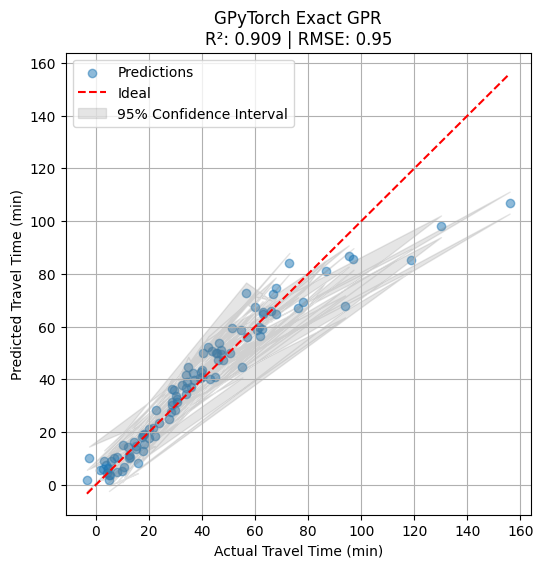

In [25]:
import torch
import gpytorch

# Transform inputs with sklearn pipeline preprocessing
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Convert numpy arrays to torch tensors
train_x = torch.from_numpy(X_train_transformed).float()
train_y = torch.from_numpy(y_train.to_numpy()).float()

test_x = torch.from_numpy(X_test_transformed).float()

# Define the GP model with GPyTorch
class ExactGPModel(gpytorch.models.ExactGP):
    def __init__(self, train_x, train_y, likelihood):
        super().__init__(train_x, train_y, likelihood)
        self.mean_module = gpytorch.means.ConstantMean()
        self.covar_module = gpytorch.kernels.ScaleKernel(
            gpytorch.kernels.RBFKernel()
        )
        
    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

# Initialize likelihood and model
likelihood = gpytorch.likelihoods.GaussianLikelihood()
model = ExactGPModel(train_x, train_y, likelihood)

# Use GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
likelihood = likelihood.to(device)
train_x = train_x.to(device)
train_y = train_y.to(device)
test_x = test_x.to(device)

# Training hyperparameters
training_iterations = 100  # You can adjust this to control training time

# Set model in training mode
model.train()
likelihood.train()

# Use the Adam optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

# "Loss" for GPs - marginal log likelihood
mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)

for i in range(training_iterations):
    optimizer.zero_grad()
    output = model(train_x)
    loss = -mll(output, train_y)
    loss.backward()
    if i % 10 == 0:
        print(f'Iteration {i + 1}/{training_iterations} - Loss: {loss.item():.3f}')
    optimizer.step()

# Evaluation mode
model.eval()
likelihood.eval()

with torch.no_grad(), gpytorch.settings.fast_pred_var():
    observed_pred = likelihood(model(test_x))
    y_pred = observed_pred.mean.cpu().numpy()
    y_std = observed_pred.stddev.cpu().numpy()

# Evaluate
mse_gpr = mean_squared_error(y_test, y_pred)
r2_gpr = r2_score(y_test, y_pred)

# Plot results with confidence intervals
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal')
plt.fill_between(
    y_test,
    y_pred - 1.96 * y_std,
    y_pred + 1.96 * y_std,
    color='gray', alpha=0.2,
    label='95% Confidence Interval'
)
plt.xlabel("Actual Travel Time (min)")
plt.ylabel("Predicted Travel Time (min)")
plt.title(f"GPyTorch Exact GPR\nR²: {r2_gpr:.3f} | RMSE: {np.sqrt(r2_gpr):.2f}")
plt.legend()
plt.grid(True)
plt.show()


# 18. Quantile Regression (QReg)

### Definition:
Quantile Regression is a type of regression that estimates conditional quantiles (such as the median, 90th percentile, etc.) of the target variable, rather than just the mean. It is particularly useful when the data distribution is skewed or has outliers.

Unlike ordinary least squares (OLS) regression, which estimates the conditional mean of the target variable, Quantile Regression allows you to model different quantiles (e.g., 10th, 50th, 90th percentiles).

This approach is beneficial for understanding the behavior of the tail distributions (e.g., the extreme high or low values) of the data.

### Real-World Usage:
- **Real Estate Price Prediction**: Estimating not just the average, but also the lower and upper price limits (e.g., 25th and 75th percentiles) of a house in a specific neighborhood.
- **Risk Management**: In finance, it helps in estimating the Value at Risk (VaR) by predicting the lower quantile of potential losses.
- **Healthcare**: Predicting different quantiles of patient outcomes, such as recovery time or hospital costs.


In [26]:
import statsmodels.api as sm

X_train_processed = preprocessor.fit_transform(X_train)

feature_names = numeric + list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical))

# Set index explicitly to align with y_train
X_train_df = pd.DataFrame(X_train_processed, columns=feature_names, index=X_train.index)

# Add constant column
X_train_df = sm.add_constant(X_train_df)

# Now y_train and X_train_df have aligned indices
model = sm.QuantReg(y_train, X_train_df)
quant_reg = model.fit(q=0.5)

print(quant_reg.summary())


                         QuantReg Regression Results                          
Dep. Variable:        travel_time_min   Pseudo R-squared:               0.7278
Model:                       QuantReg   Bandwidth:                       4.592
Method:                 Least Squares   Sparsity:                        16.87
Date:                Fri, 13 Jun 2025   No. Observations:                  400
Time:                        13:12:16   Df Residuals:                      391
                                        Df Model:                            8
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     56.1960      0.994     56.525      0.000      54.241      58.151
distance_km               21.4595      0.428     50.152      0.000      20.618      22.301
time_of_day                0.3004      0.424      0.709      0.479      -0.533     

MSE: 77.52119370714249
R2: 0.9092313750864774


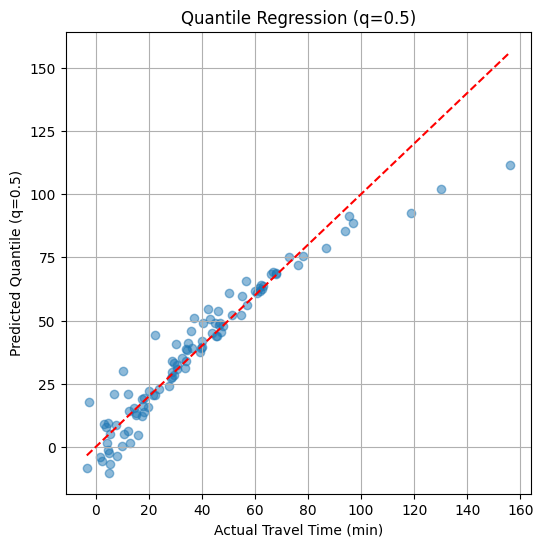

In [27]:
# Process the test data
X_test_processed = preprocessor.transform(X_test)

# Create DataFrame with the same feature names as the training set
X_test_df = pd.DataFrame(X_test_processed, columns=feature_names, index=X_test.index)

# Add constant for intercept
X_test_df = sm.add_constant(X_test_df)

# Predict using the fitted quantile regression model
y_pred_quantile = quant_reg.predict(X_test_df)

# Calculate evaluation metrics
mse_qur = mean_squared_error(y_test, y_pred_quantile)
r2_qur = r2_score(y_test, y_pred_quantile)

# Print the evaluation metrics
print(f"MSE: {mse_qur}")
print(f"R2: {r2_qur}")

# Plot the results
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_quantile, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Travel Time (min)")
plt.ylabel("Predicted Quantile (q=0.5)")
plt.title("Quantile Regression (q=0.5)")
plt.grid(True)
plt.show()

<h1><b><i>Best Model</i></b></h1>

In [28]:
results = {
    "Model": [
        "Linear Regression",
        "Polynomial Regression",
        "Ridge Regression",
        "Lasso Regression",
        "Elastic Net Regression",
        "Support Vector Regression",
        "Decision Tree Regression",
        "Random Forest Regression",
        "Gradient Boosting Regressor",
        "XGBoost Regressor",
        "K-Nearest Neighbors",
        "Bayesian Ridge Regression",
        "Huber Regression",
        "Theil-Sen Estimator",
        "Partial Least Squares Regression",
        "Neural Network Regression",
        "Gaussian Process Regression",
        "Quantile Regression"
    ],
    "R2_Score": [
        r2_linear, r2_poly, r2_ridge, r2_lasso, r2_enet,
        r2_svr, r2_tree, r2_rf, r2_gbr, r2_xgb,
        r2_knn, r2_bayes, r2_huber, r2_theilsen,
        r2_pls, r2_nn, r2_gpr, r2_qur
    ],
    "RMSE": [
        np.sqrt(mse_linear), np.sqrt(mse_poly), np.sqrt(mse_ridge), np.sqrt(mse_lasso), np.sqrt(mse_enet),
        np.sqrt(mse_svr), np.sqrt(mse_tree), np.sqrt(mse_rf), np.sqrt(mse_gbr), np.sqrt(mse_xgb),
        np.sqrt(mse_knn), np.sqrt(mse_bayes), np.sqrt(mse_huber), np.sqrt(mse_theilsen),
        np.sqrt(mse_pls), np.sqrt(mse_nn), np.sqrt(mse_gpr), np.sqrt(mse_qur)
    ]
}

df_results = pd.DataFrame(results)

df_results.sort_values(by="R2_Score", ascending=False)

,Model,R2_Score,RMSE
1,Polynomial Regression,0.987249,3.300036
15,Neural Network Regression,0.984096,3.685450
9,XGBoost Regressor,0.977762,4.358036
8,Gradient Boosting Regressor,0.974867,4.633058
7,Random Forest Regression,0.962420,5.665262
6,Decision Tree Regression,0.927704,7.857787
12,Huber Regression,0.909689,8.782412
16,Gaussian Process Regression,0.909235,8.804433
17,Quantile Regression,0.909231,8.804612
3,Lasso Regression,0.907287,8.898398


<h1><b><i>Key Concepts</i></b></h1>

| Model                               | Key Points                                                                          | Real-World Usage Examples                                 |
| ----------------------------------- | ----------------------------------------------------------------------------------- | --------------------------------------------------------- |
| **Linear Regression**               | Simple, interpretable, assumes linearity                                            | Housing price prediction, sales forecasting               |
| **Polynomial Regression**           | Captures nonlinear relationships by polynomial terms                                | Growth curve modeling, fuel consumption                   |
| **Ridge Regression**                | L2 regularization, reduces overfitting                                              | Risk modeling in finance, gene expression analysis        |
| **Lasso Regression**                | L1 regularization, performs feature selection                                       | Feature selection in text mining, genomics                |
| **Elastic Net Regression**          | Combines L1 and L2 penalties, balances sparsity and stability                       | Medical data analysis, high-dimensional sensor data       |
| **Support Vector Regression (SVR)** | Finds optimal hyperplane in feature space; uses kernels for nonlinear relationships | Stock price prediction, time series forecasting           |
| **Decision Tree Regression**        | Tree-based model, easy to interpret, can overfit                                    | Traffic flow prediction, customer segmentation            |
| **Random Forest Regression**        | Ensemble of trees, reduces overfitting, captures nonlinearities                     | Traffic prediction, energy demand forecasting             |
| **Gradient Boosting Regression**    | Sequential boosting of weak learners, highly accurate                               | Credit scoring, fraud detection                           |
| **XGBoost Regression**              | Efficient, scalable gradient boosting; handles missing data and regularization      | Competition-winning models, sales and marketing analytics |
| **K-Nearest Neighbors**             | Predicts using average of nearest neighbors, sensitive to scaling                   | Recommender systems, localized traffic time estimation    |
| **Bayesian Ridge**                  | Probabilistic regression, estimates uncertainty                                     | Predictive maintenance, financial risk assessment         |
| **Huber Regression**                | Robust to outliers, mixes squared and absolute loss                                 | Sensor fault detection, noisy data modeling               |
| **Theil-Sen Estimator**             | Non-parametric, robust to outliers                                                  | Environmental data modeling, small noisy datasets         |
| **Quantile Regression**             | Estimates conditional quantiles, useful for asymmetric targets                      | Real estate price percentiles, risk assessment            |
| **Partial Least Squares**           | Handles multicollinearity by extracting components                                  | Chemometrics, spectroscopy                                |
| **Gaussian Process Regression**     | Non-parametric, provides uncertainty and smooth predictions                         | Spatial interpolation, robotics control                   |
| **Neural Network Regression**       | Learns complex nonlinear mappings, requires tuning                                  | Image/video processing, advanced forecasting              |
